## データ準備

In [391]:
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.api import qqplot
import pandas as pd
%matplotlib inline

In [424]:
df = sns.load_dataset('tips')

df['tip_rate'] = df['tip'] / df['total_bill']

In [9]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [11]:
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [12]:
#もうちょっと俯瞰してデータがどうなのか見たい
# →ヒストグラム、棒グラフ

## 分布の描画

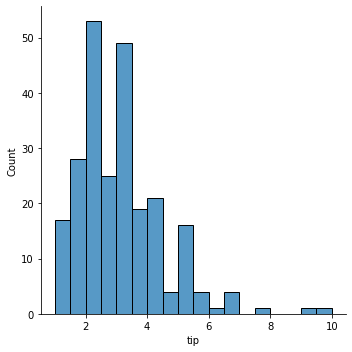

In [17]:
sns.displot(df['tip'],kde=False)

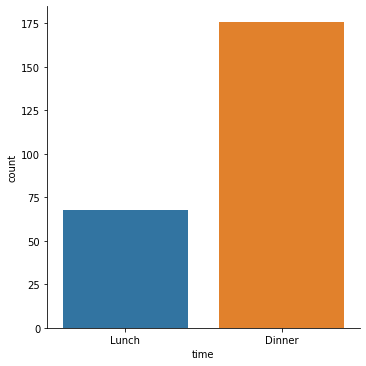

In [18]:
sns.catplot(x='time',data=df, kind='count')

## 平均値

In [23]:
np.mean(df['tip_rate'])

0.16080258172250478

In [24]:
df['tip_rate'].mean()

0.16080258172250478

In [30]:
df.groupby('sex').mean()['tip_rate']

sex
Male      0.157651
Female    0.166491
Name: tip_rate, dtype: float64

<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

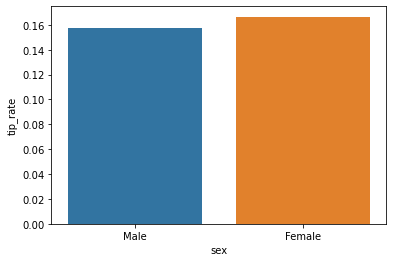

In [28]:
sns.barplot(x='sex',y='tip_rate',data=df,ci=None)

## 中央値

In [34]:
np.median(df['tip_rate'])

0.15476977125802577

In [33]:
df['tip_rate']

0      0.059447
1      0.160542
2      0.166587
3      0.139780
4      0.146808
         ...   
239    0.203927
240    0.073584
241    0.088222
242    0.098204
243    0.159744
Name: tip_rate, Length: 244, dtype: float64

In [35]:
#中央値と平均値の値が違う
#　→外れ値が原因

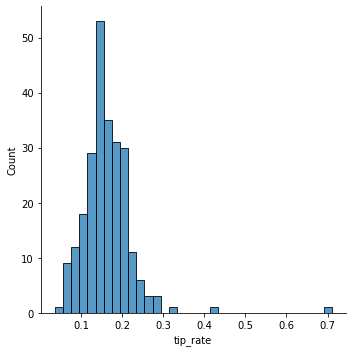

In [37]:
sns.displot(df['tip_rate'],kde=False)

In [38]:
df['tip_rate'].median()

0.15476977125802577

In [39]:
df['tip_rate'].mean()

0.16080258172250478

In [40]:
df.groupby('sex').median()

,total_bill,tip,size,tip_rate
sex,,,,
Male,18.35,3.00,2,0.153492
Female,16.40,2.75,2,0.155581


<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

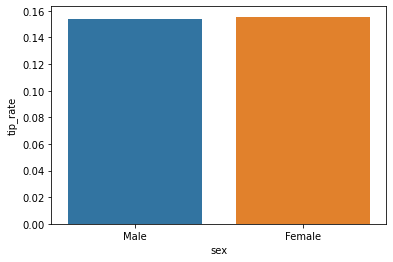

In [42]:
sns.barplot(x='sex',y='tip_rate',data=df,estimator=np.median,ci=None)

In [44]:
df.sort_values('tip_rate',ascending=False)

,total_bill,tip,sex,smoker,day,time,size,tip_rate
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
...,...,...,...,...,...,...,...,...
187,30.46,2.00,Male,Yes,Sun,Dinner,5,0.065660
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
57,26.41,1.50,Female,No,Sat,Dinner,2,0.056797
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.056433


## 最頻値

In [50]:
mode,count=stats.mode(df)

In [53]:
print(mode)
print(count)

[[13.42 2.0 'Male' 'No' 'Sat' 'Dinner' 2 0.1448225923244026]]
[[  3  33 157 151  87 176 156   2]]


In [54]:
df['size'].mode()

0    2
dtype: int64

## 範囲

In [55]:
np.min(df['tip'])

1.0

In [56]:
df['tip'].min()

1.0

In [57]:
df.groupby('sex').min()

,total_bill,tip,size,tip_rate
sex,,,,
Male,7.25,1.0,1,0.035638
Female,3.07,1.0,1,0.056433


In [58]:
df.groupby('sex').max()

,total_bill,tip,size,tip_rate
sex,,,,
Male,50.81,10.0,6,0.710345
Female,44.30,6.5,6,0.416667


## 四分位数

データを並べて4分割した時の25%,50%,75%  外れ値に強い

Q_3 - Q_1:四分位範囲(IQR)

(Q_3 - Q_1)/2 : 四分位偏差(QD)

In [62]:
np.quantile(df['tip_rate'],[0.25,0.5,0.75])

array([0.12912736, 0.15476977, 0.19147549])

In [64]:
df['tip_rate'].quantile([0.25,0.5,0.75])

0.25    0.129127
0.50    0.154770
0.75    0.191475
Name: tip_rate, dtype: float64

In [65]:
stats.iqr(df['tip_rate'])  ##iqr

0.06234812458689151

In [66]:
stats.iqr(df['tip_rate'])/2.  ##idr

0.031174062293445756

### 箱ひげ図

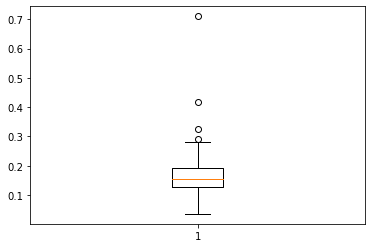

In [72]:
plt.boxplot(df['tip_rate'])
plt.show()

<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

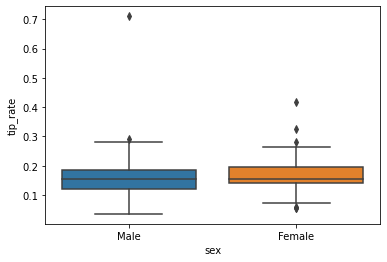

In [75]:
sns.boxplot(x='sex',y='tip_rate',data=df)

## 平均偏差
　・平均(もしくは中央値)からの偏差の絶対値の平均

　・絶対値が扱いにくい

### →絶対値は扱いにくいので二乗する

## 分散(variance)

・平均からの偏差の**2乗**の平均

・通常標本の分散はs<sup>2</sup>、母集団の分散はσ<sup>2</sup>で表す



### 　→二乗すると尺度がズレるので平方根をとる



## 標準偏差(standard deviation)

・平均からの偏差の2乗の平均**の平方根**(**分散の平方根**)

・通常標本の標準偏差はs,母集団の標準偏差はσで表す



## 分散と標準偏差

<u>分散を求める</u>

・np.var()

<u>標準偏差を求める</u>

・np.std()


## 分散

In [79]:
np.var(df['tip'])

1.9066085124966428

## 標準偏差

In [78]:
np.std(df['tip'])

1.3807999538298958

## 共分散(covariance)

・2変数間の記述統計

$$
s_{xy} = \sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})
$$


## 共分散行列(covariance matrix)

・複数の変数間の分散と共分散を行列にしたもの

・変数が多くなると行列で捉えた方が便利

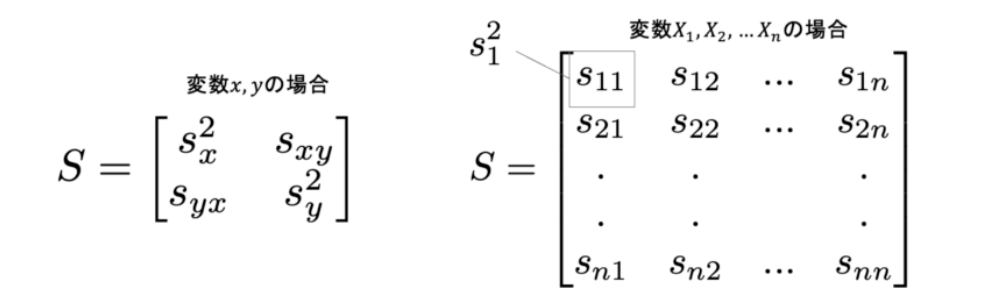

## 共分散

In [82]:
np.cov(df['total_bill'],df['tip'],bias=True)

array([[78.92813149,  8.28938892],
       [ 8.28938892,  1.90660851]])

In [87]:
x = np.stack([df['total_bill'],df['tip'],df['size']],axis=0)
np.cov(x,bias=True)

array([[78.92813149,  8.28938892,  5.04522121],
       [ 8.28938892,  1.90660851,  0.64126747],
       [ 5.04522121,  0.64126747,  0.9008835 ]])

**尺度が違うので**必ずしも相関を比べることはできない！

### →標準化する必要がある(**相関係数**)

## 相関係数

・共分散を標準化したのが相関係数

・共分散の取りうる値（最小値〜最大値）を計算し、-1~1の範囲にすることを考える

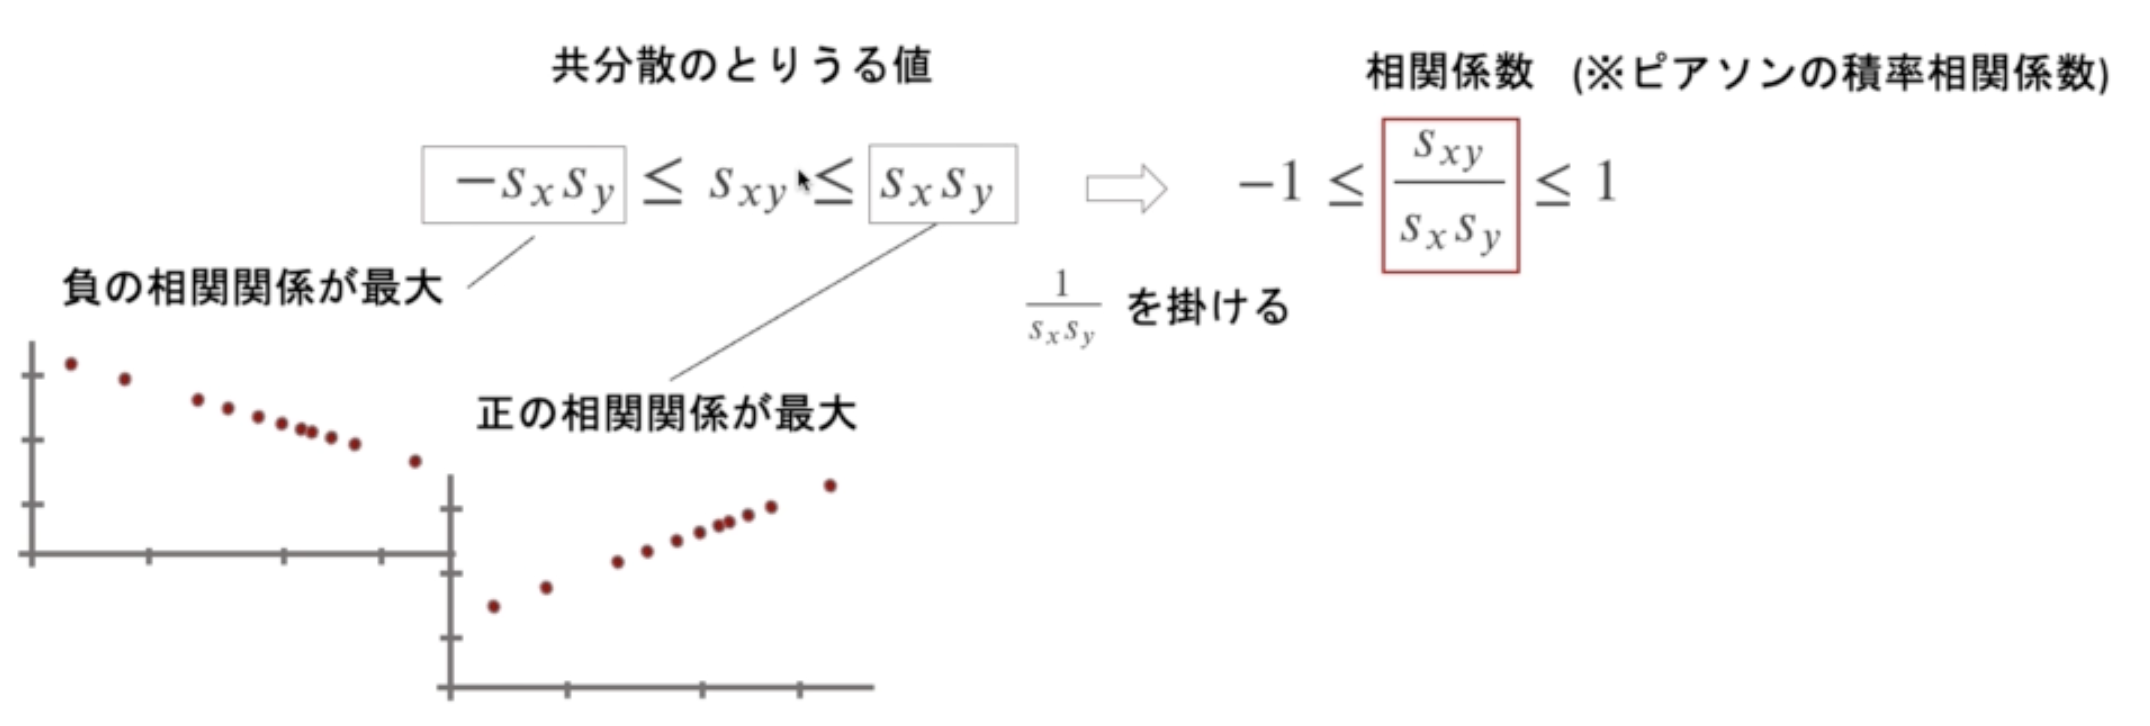

## 相関行列

・複数の変数間の相関係数を行列にしたもの

・対角要素は1になる

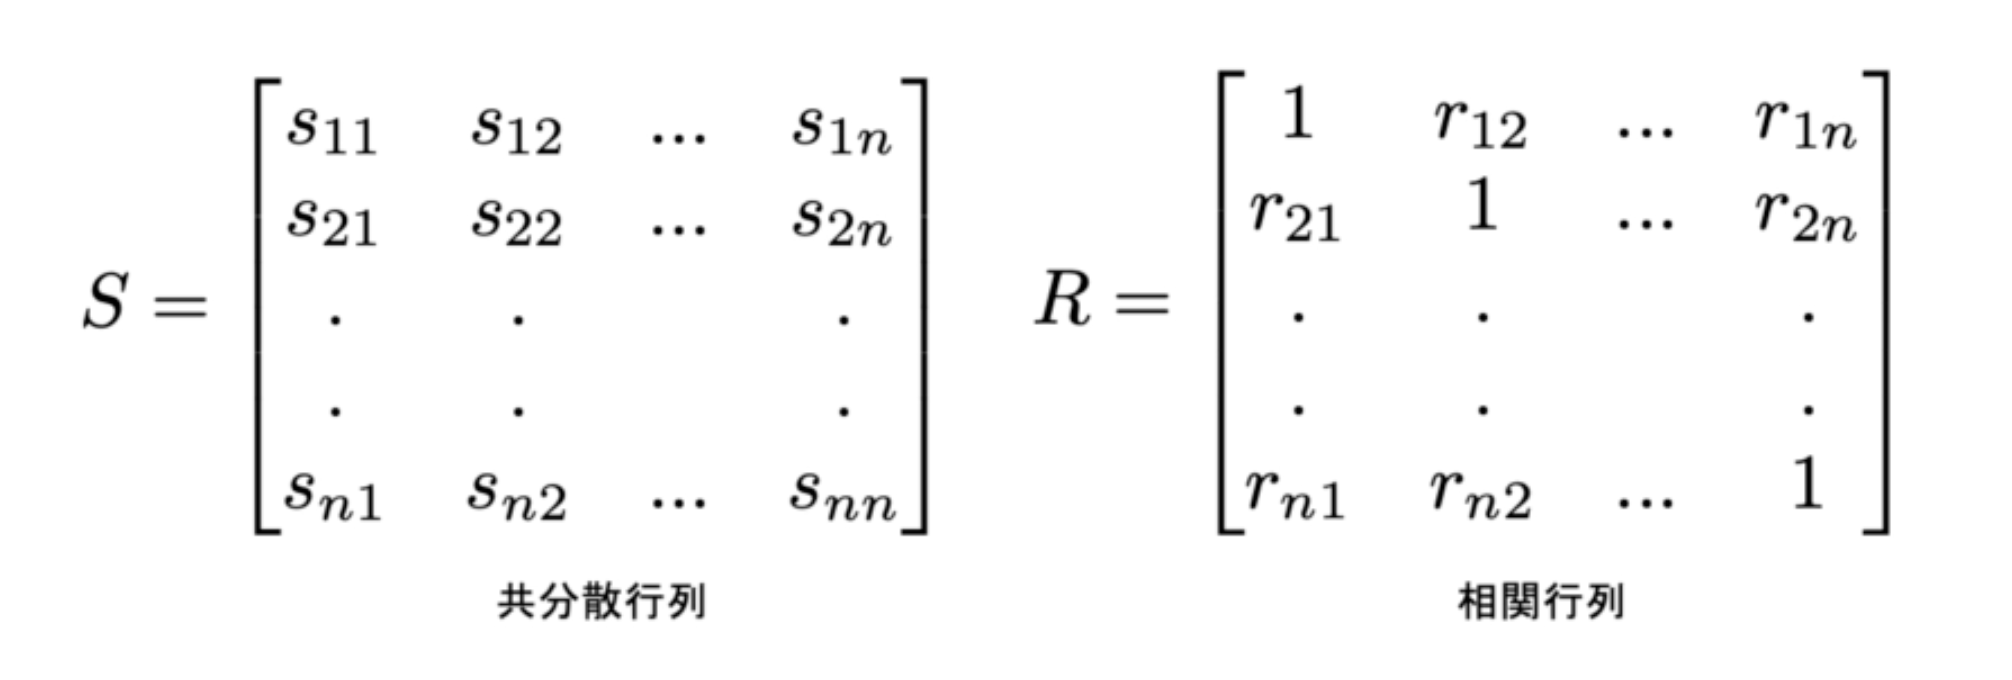




## 相関係数(correlation coefficient)

<u>相関係数を求める</u>

 ・np.corrcoef(xarray,yarray)

 ・np.corrcoef(array)
 
 ・df.corr()

<u>相関行列を描画する</u>

 ・sns.heatmap(df.corr())

In [88]:
np.corrcoef(df['total_bill'],df['tip'])

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

In [89]:
x = np.stack([df['total_bill'],df['tip'],df['size']],axis=0)
np.corrcoef(x)

array([[1.        , 0.67573411, 0.59831513],
       [0.67573411, 1.        , 0.48929878],
       [0.59831513, 0.48929878, 1.        ]])

| Pair             | Value  |
|------------------|--------|
| total_bill - tip | 0.6757 |
| total_bill - size| 0.5983 |
| tip - size       | 0.4893 |


In [90]:
df.corr()

,total_bill,tip,size,tip_rate
total_bill,1.000000,0.675734,0.598315,-0.338624
tip,0.675734,1.000000,0.489299,0.342370
size,0.598315,0.489299,1.000000,-0.142860
tip_rate,-0.338624,0.342370,-0.142860,1.000000


<AxesSubplot:>

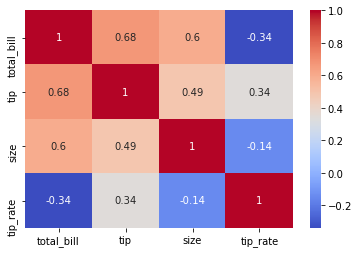

In [92]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)






## 連関(association)

・カテゴリ変数間の相関関係

・分割表(contingency table)を用いて計算する

・分割表内の数字を観測度数(observed frequency)という

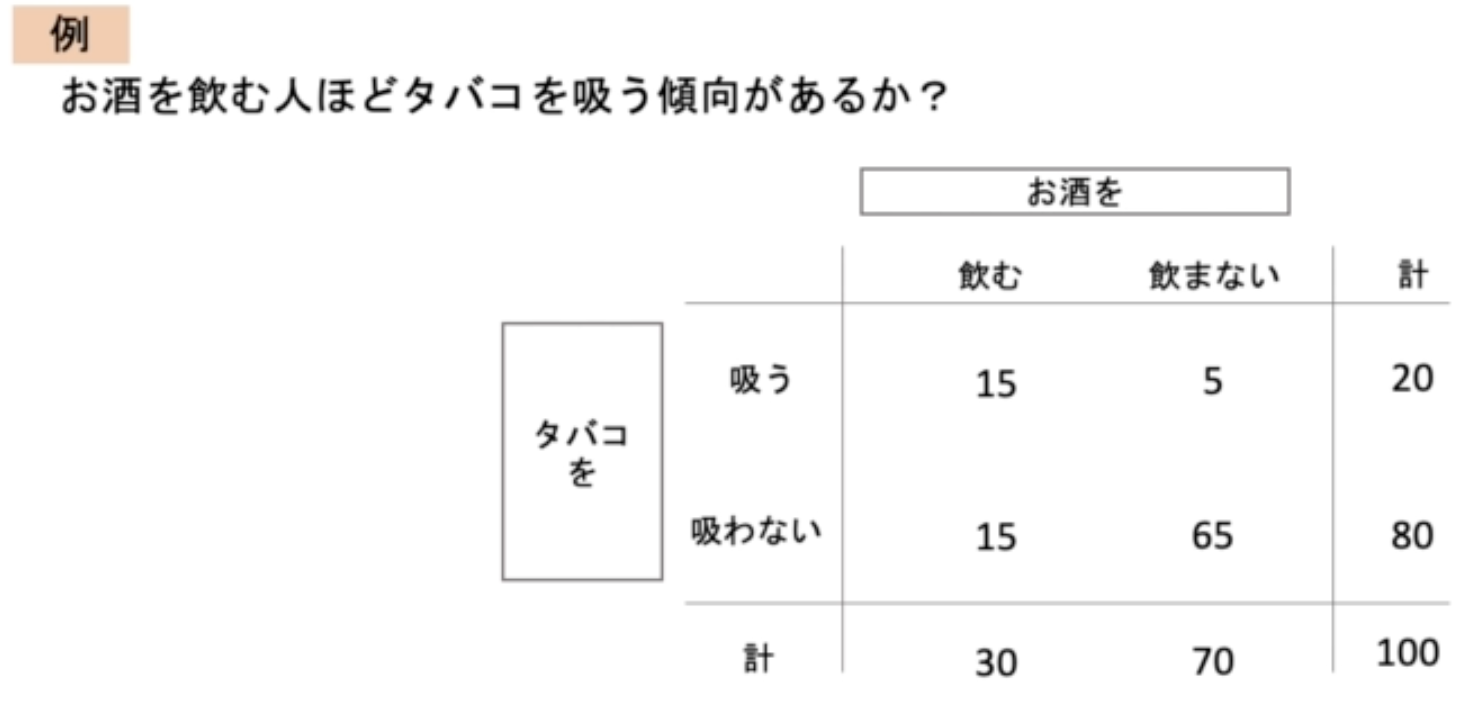

 
 
 
 

## 期待度数(expected frequencies)

・連関が無いと想定した場合の度数

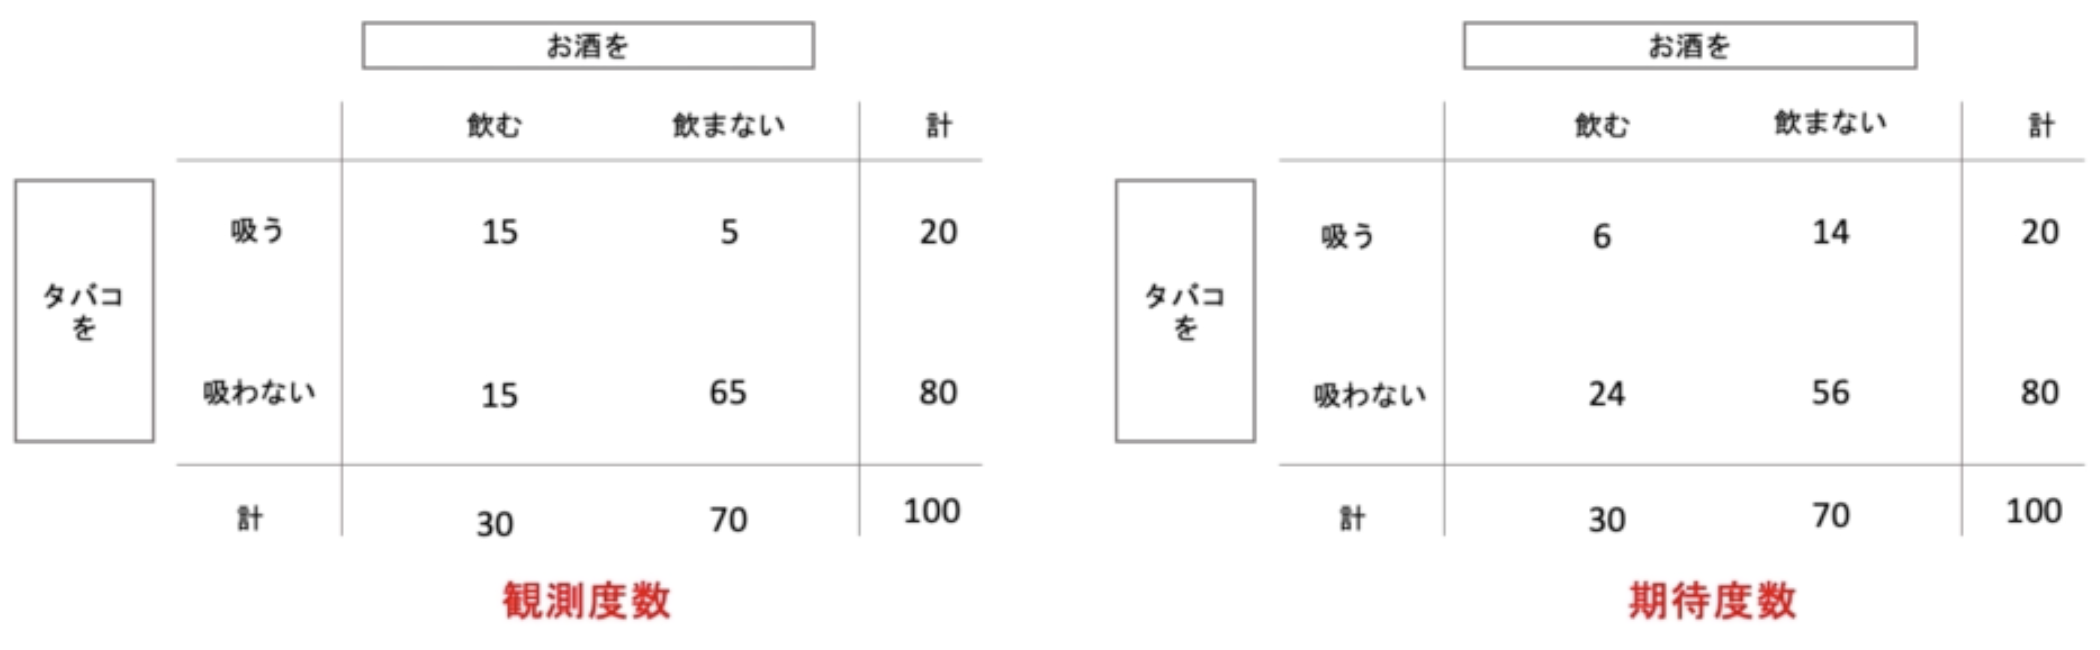

期待度数・・・**比率が同じになるはず**

## カイ二乗（$\chi^2$：chi squared）

・観測度数が期待度数からどれくらい離れているかを計算した値

・{（観測度数ー期待度数）$^2$/期待度数}の総和

$$
\chi^2 = \sum_{i=1}^{a} \sum_{j=1}^{b} \frac{(n_{ij} - e_{ij})^2}{e_{ij}}
$$


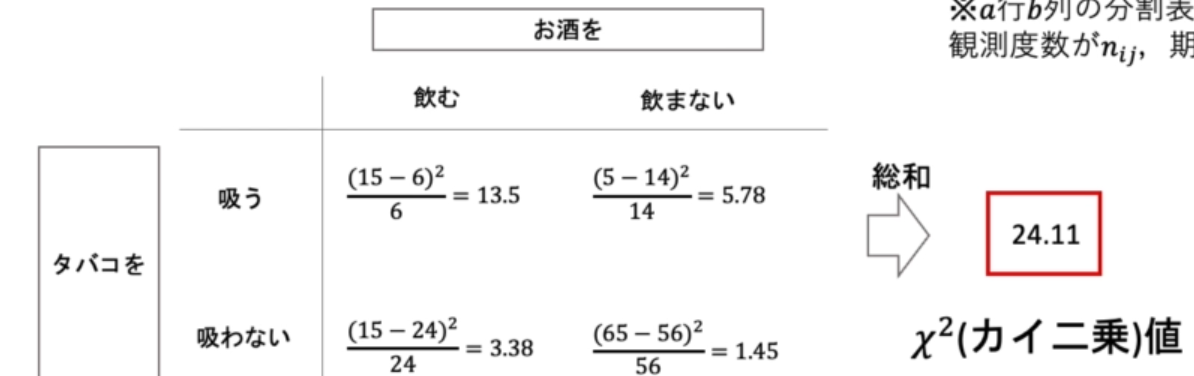


#### **共分散と同じで、標準化されてない**
 
 
 
 
 

## 連関(association)

<u>分割表を求める</u>

・pd.crosstab(xarray,yarray)

<u>$\chi^2$と期待度数を求める</u>

・stats.chi2_contingency(cont_table,correction=Fasle)

第一戻り値：$\chi^2$

第四戻り値：期待度数の分割表

In [95]:
pd.crosstab(df['sex'],df['time'])

time,Lunch,Dinner
sex,,
Male,33,124
Female,35,52


In [96]:
cont_table = pd.crosstab(df['sex'],df['time'])
stats.chi2_contingency(cont_table,correction=False)

(10.277251918677742,
 0.0013468039268008766,
 1,
 array([[ 43.75409836, 113.24590164],
        [ 24.24590164,  62.75409836]]))

<style>
  table {
    width: 100%;
    border-collapse: collapse;
    text-align: center;
  }
  th, td {
    border: 1px solid black;
    padding: 8px;
    text-align: center;
  }
  pre {
    text-align: left; /* 配列のフォーマットを保持するために左揃え */
    display: inline-block;
  }
</style>

<table>
  <tr>
    <th>Pair</th>
    <th>Value</th>
  </tr>
  <tr>
    <td>\(\chi^2\)</td>
    <td>10.277251918677742</td>
  </tr>
  <tr>
    <td>期待度数</td>
    <td>
      <pre>
array([[ 43.75409836, 113.24590164],
       [ 24.24590164,  62.75409836]])
      </pre>
    </td>
  </tr>
</table>


## クラメールの連関係数

・連関の強さを表す指標

・$\chi^2$値を0〜1に標準化した値

$$
V = \sqrt{\frac{\chi^2}{( \min(a, b) - 1) N}}
$$

　　　　　　　　　　　　　　　　　　　　　　　　　※min(a,b)は、行数a,列数bのうちの小さい方

In [107]:
def cramers_v(xarray, yarray):
    cont_table = pd.crosstab(xarray,yarray)
    chi_2 = stats.chi2_contingency(cont_table,correction=False)[0]
    xlen = len(xarray.unique())
    ylen = len(yarray.unique())
    smaller = min(xlen,ylen)
    total_sum = cont_table.values.sum()
    v_2 = chi_2 / ((smaller - 1) * total_sum)
    return np.sqrt(v_2)

In [108]:
cramers_v(df['sex'],df['time'])

0.20523129613344476

## 確率(probability)とは

・ある試行試行を同じ条件で何度も繰り返した時にある事象が起こる相対頻度の極限

## 確率変数(random variable)

・値が確率的に変動する変数

・通常Xで表す

・それぞれの値に確率P(X)が対応している

## 確率分布(probability distribution)

・確率がどのように分布しているのかを表したもの

・確率変数は、確率分布から生成された値と考えるとわかりやすい

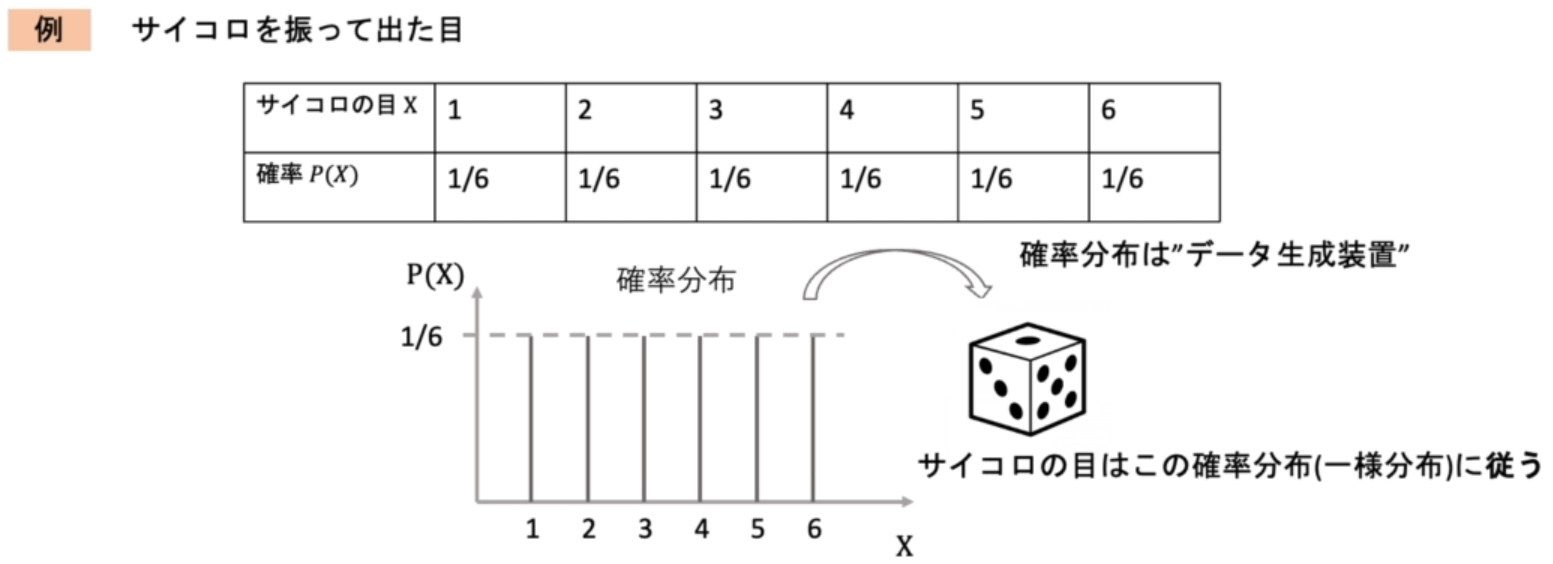

<u>確率分布</u>

・stats.<確率分布>.<メソッド>

<u>一様分布からランダムにデータを生成する</u>

・stats.randint.rvs(low,high)　　　　(lowからhigh-1までのランダムな整数を生成)

・stats.uniform.rvs(loc,scale)　　　　(locからloc+scaleまでのランダムな値を生成)

In [110]:
# random variates(rvs): 確率変量
stats.randint.rvs(1,7)

5

In [112]:
stats.uniform.mean(0,1)

0.5

### ↑離散型確率変数、連続型確率変数

・離散型確率分布
　
 
　関数f(x):確率質量関数(PMF:Probability Mass Function)　(fx(x) = P(X = x))
 


・連続型確率分布


　関数fx(x):確率密度関数(PDF:Probabiliry Density Function)

## 確率分布の描画

In [113]:
def simple_func(x):
    return 2*x + 3

In [114]:
simple_func(10)

23

In [117]:
x = np.linspace(-3, 3, 100)
y = simple_func(x)

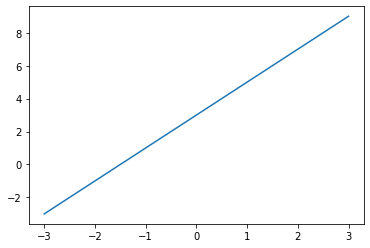

In [118]:
plt.plot(x,y)

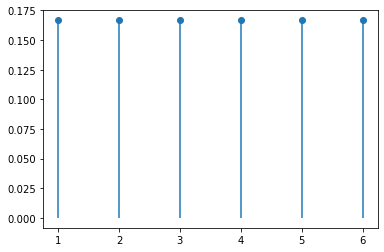

In [126]:
x = np.arange(1, 7)
y = stats.randint(1, 7).pmf(x)
plt.plot(x,y, 'o')
plt.vlines(x, 0, y)

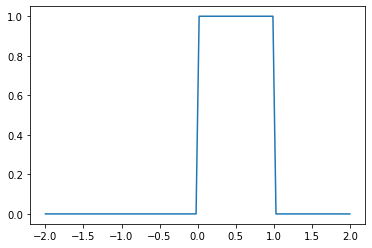

In [127]:
x = np.linspace(-2, 2, 100)
y = stats.uniform(0, 1).pdf(x)
plt.plot(x, y)

## 確率密度と確率

・確率密度関数が描く面積が確率になる

・確率密度関数が描く全面積は1になる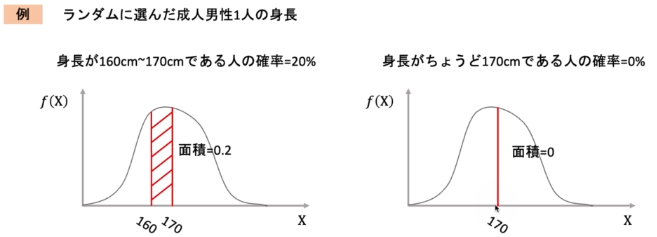

## 累積分布関数(CDF:Cumulative Distribution Function)

・確率密度関数を負の無限大からある値(x)まで確率を積み上げた値を返す関数

## 累積分布関数(CDF)の描画

<u>正規分布の確率密度関数(PDF)と累積分布関数(CDF)を描画する</u>

・PDF:stats.norm.pdf(x)

・CDF:stats.norm.cdf(x)

<u>右側の面積(1-累積分布関数(CDF))を求める</u>

・SF(Survival Function):stats.norm.sf(x)

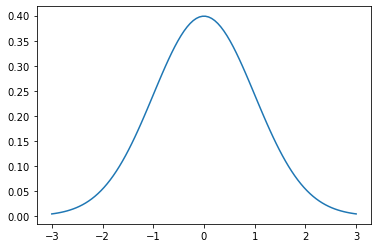

In [131]:
x = np.linspace(-3, 3, 100)
y = stats.norm.pdf(x)
plt.plot(x,y)

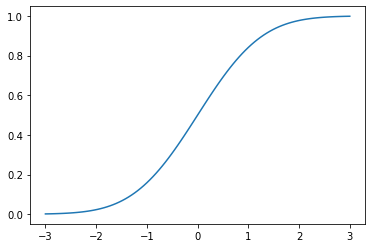

In [132]:
y = stats.norm.cdf(x)
plt.plot(x,y)

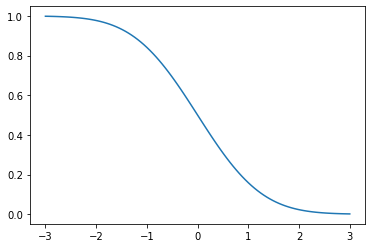

In [133]:
y = stats.norm.sf(x)
plt.plot(x,y)

## 正規分布(normal distribution)

・最もよく使われる分布

・自然界の多くで見られる分布(身長、誤差)

・統計学の理論でもよく出てくる分布

・平均μと分散$σ^2$で形状が決まる$N(μ,σ^2)$

正規分布の式は以下の通りです：

正規分布の式は以下の通りです：

$$
\frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
$$

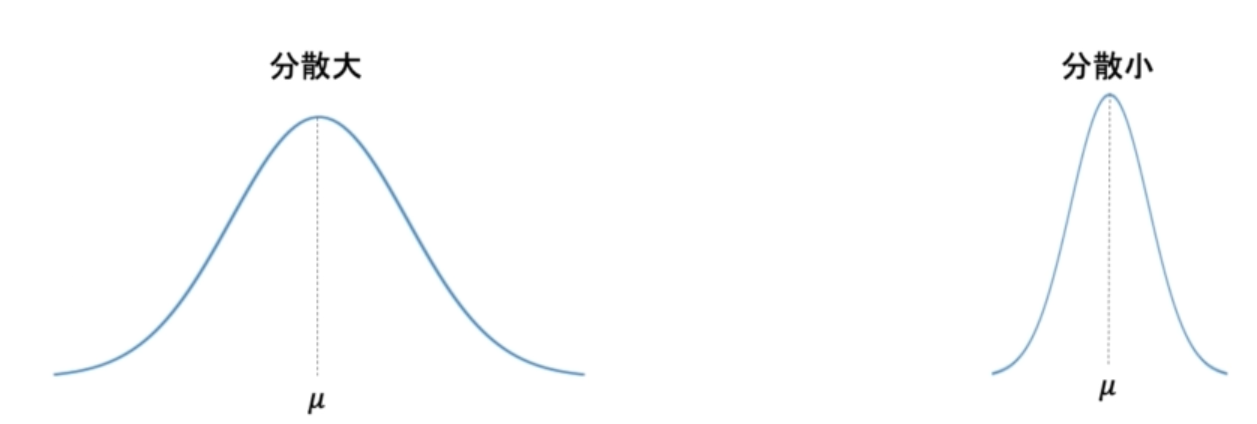

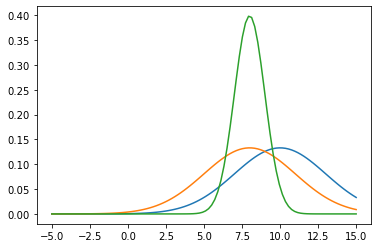

In [143]:
x = np.linspace(-5, 15, 100)
y = stats.norm(loc=10, scale=3).pdf(x)
y2 = stats.norm(loc=8, scale=3).pdf(x)
y3 = stats.norm(loc=8, scale=1).pdf(x)
plt.plot(x,y)
plt.plot(x,y2)
plt.plot(x,y3)

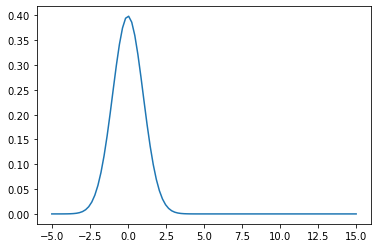

In [145]:
y = stats.norm.pdf(x) #標準正規分布
plt.plot(x,y)

## カーネル密度推定(KDE:Kernel Density Estimation)

・観測した分布から確率密度関数(確率分布)を推定する

・境界値がある場合は、ミラーリングさせる

・2*bound - data計算すればOK
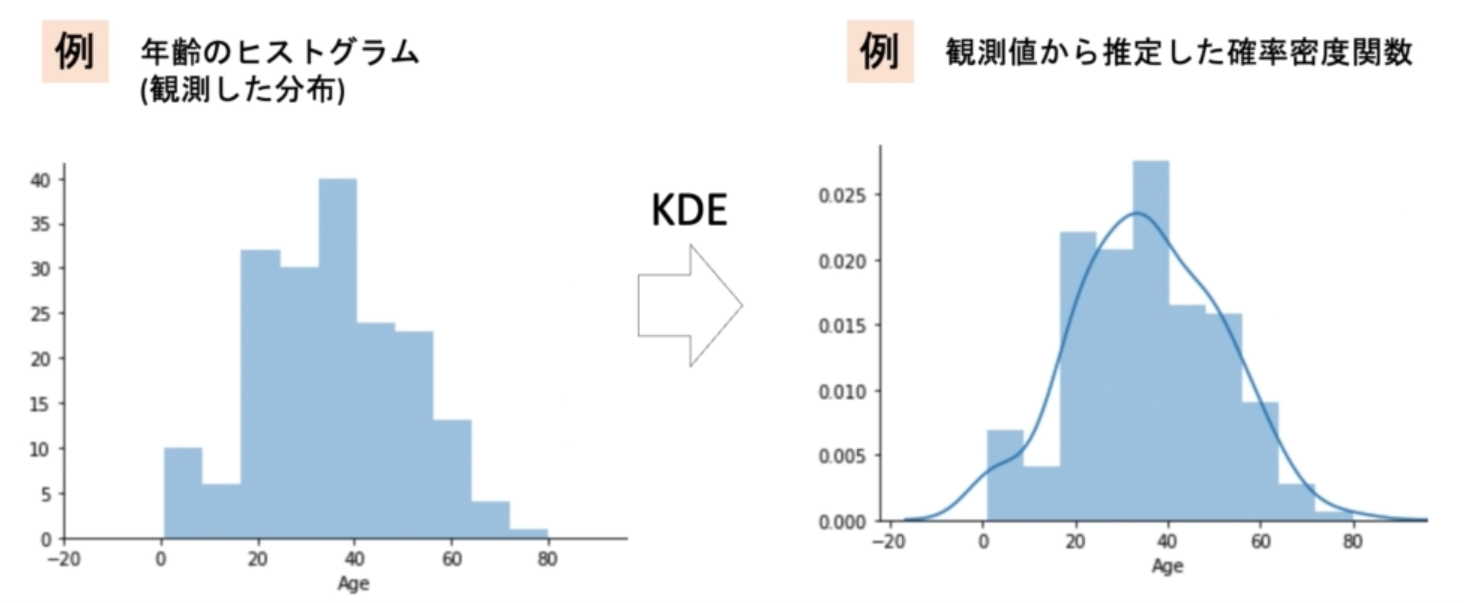

<u>KDEした確率分布を求める</u>

・stats.gaussian_kde(dataset)

<u>KDEを描画する</u>

・sns.displot(a, kde=True)

・stats.gaussian_kde(dataset).pdf(x)

## KDE

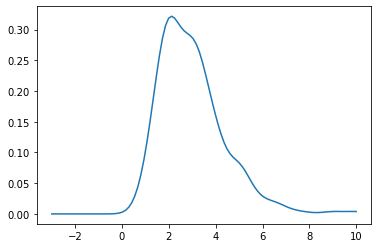

In [151]:
x = np.linspace(-3, 10, 100)
y = stats.gaussian_kde(df['tip']).pdf(x)
plt.plot(x,y)

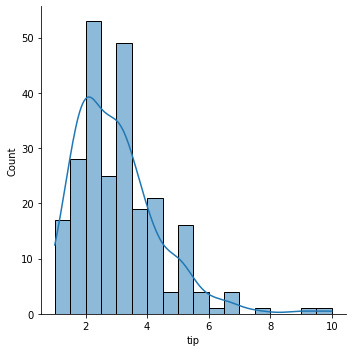

In [152]:
sns.displot(df['tip'], kde=True)

### 推定した確率分布からさらにサンプリングする

In [153]:
resample_data = stats.gaussian_kde(df['tip']).resample()

## 68-95-99.7ルール

平均4,標準偏差3の正規分布からランダムに値を取得する

すると、μ±σ、μ±2σ、μ±3σの割合がそれぞれ68%,95%,99.7%になる。

In [158]:
group1 = []
group2 = []
group3 = []
samples = []
loc = 4
scale =3
for i in range(1000):
    sample = stats.norm(loc=loc,scale=scale).rvs()
    samples.append(sample)
    if loc - scale < sample < loc + scale:
        group1.append(sample)
    elif loc-2*scale < sample < loc+2*scale:
        group2.append(sample)
    elif loc-3*scale < sample < loc+3*scale:
        group3.append(sample)
print(len(group1)/len(samples))
print((len(group1)+len(group2))/len(samples))
print((len(group1)+len(group2)+len(group3))/len(samples))

0.691
0.957
0.997


## 標準化

・平均を0,分散を1にすること(z得点)

・標準化することによって、尺度を揃えることができ、比較することが可能

・各値から平均を引き、標準偏差で割る


$$
z = \frac{x - \mu}{s}
$$


## 偏差値(T-score)

・平均を50,標準偏差を10にすること(T得点)

## 標準正規分布（standard normal distribution）

・平均0,分散1の正規分布(正規分布を標準化したもの)
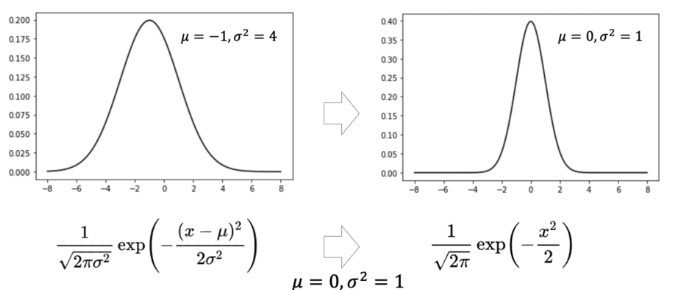

## 標準化

In [161]:
scaler = StandardScaler()

In [162]:
scaler.fit_transform([[1],[2],[3],[4]])

array([[-1.34164079],
       [-0.4472136 ],
       [ 0.4472136 ],
       [ 1.34164079]])

In [326]:
scaled = scaler.fit_transform(df['tip_rate'].values.reshape(-1,1))

## 二項分布

・様々な確率分布の基礎となる分布

・ある観察や試行を複数回行ったときに、ある事象が起こる回数が従う確率分布

## 標本分布

In [170]:
m = 100
n = 50
column = 'tip'
sample_means = []
for i in range(m):
    sampled_df = df.sample(n)
    sample_mean = sampled_df[column].mean()
    sample_means.append(sample_mean)

In [173]:
#　平均
np.mean(sample_means)

3.0097899999999997

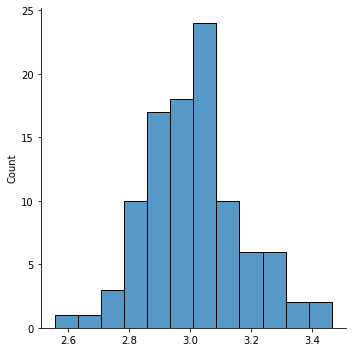

In [172]:
sns.displot(sample_means)

## 不偏分散

In [175]:
stats.tvar(df['tip'])

1.914454638062471

In [176]:
np.var(df['tip'], ddof=1)

1.9144546380624725

In [177]:
# 不偏分散の平方根
np.sqrt(stats.tvar(df['tip']))

1.3836381890011822

In [178]:
stats.tstd(df['tip'])

1.3836381890011822

## 不偏分散の不偏性


In [185]:
n = 50
m = 1000
column = 'tip'
sample_vars = []
sample_uvars = []
for i in range(m):
    sample_df = df.sample(n)
    sample_var = np.var(sample_df[column])
    sample_uvar = stats.tvar(sample_df[column])
    sample_vars.append(sample_var)
    sample_uvars.append(sample_uvar)

In [186]:
# 標本の不偏分散の平均
np.mean(sample_uvars)

1.903665484489796

In [187]:
# 母分散
np.var(df[column])

1.9066085124966428

In [188]:
# 標本の分散の平均
np.mean(sample_vars)

1.8655921748000002

## 比率の区間推定
・stats.binom.interval(alpha,n,p)

In [189]:
stats.binom.interval(0.95, 1000, 0.6)

(570.0, 630.0)

dfから50個の標本比率から母比率を区間推定

・dfから男女比の母比率を計算

・50個の標本比率を取得（95％信頼区間）

・100回繰り返して何回推定区間にあるか

In [272]:
# 母比率を計算
n = 50
alpha = 0.95
count = 0
roop_num = 100
results = []
sex_counts = df['sex'].value_counts()
sex_counts['Male']
male_ratio = sex_counts['Male'] / len(df)
for _ in range(roop_num):
    #50個の標本比率を取得
    sample_df = df.sample(n=50)
    sample_sex_counts = sample_df['sex'].value_counts()
    sample_sex_counts['Male']
    sample_male_ratio = sample_sex_counts['Male'] / len(sample_df)
    sample_male_ratio
#     print(male_ratio,sample_male_ratio)
    #推定区間を計算
    CI = stats.binom.interval(alpha, n, sample_male_ratio)
#     print(CI[0]/n, male_ratio ,CI[1]/n)
    a = CI[0]/n
    b = CI[1]/n
    # 母比率が標本比率の区間内にあるか確認
    correct = a <= male_ratio <= b
    results.append({'min':a, 'max': b, 'correct':correct})
results

## 平均の区間推定

・stats.norm.interval(alpha, loc, scale)

alpha:信頼区間　loc:標本平均　scale:不偏分散/nの平方根

In [291]:
n = 50
alpha = 0.95
popular_df_mean = df['tip'].mean()
results = []
for _ in range(100):
    sample_df = df.sample(n)
    sample_mean = sample_df['tip'].mean()
    unbiased_var = sample_df['tip'].var()
    scale = np.sqrt(unbiased_var / n)
    min_num, max_num = stats.norm.interval(alpha=alpha, loc=sample_mean, scale=scale) 
    correct = min_num < popular_df_mean < max_num
    results.append({'min':min_num, 'max':max_num, 'correct':correct})

In [292]:
result_df = pd.DataFrame(results)
result_df['correct'].value_counts()

True     96
False     4
Name: correct, dtype: int64

## t分布

・stats.t(df) 

df:degree of freedom　自由度

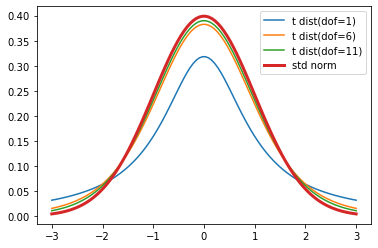

In [301]:
x = np.linspace(-3,3,100)
z = stats.norm.pdf(x)
for dof in range(1, 12, 5):
    t = stats.t(dof).pdf(x)
    plt.plot(x,t, label=f"t dist(dof={dof})")
plt.plot(x, z, label="std norm", linewidth=3)
plt.legend()

In [ ]:
t

## 正規分布とt分布を使った区間推定の比較

・stats.t.interval（alpha, loc, scale, df）

In [322]:
alpha = 0.95
n = 100
dof = n-1
column = 'tip'
#母平均
population_mean = df[column].mean()
x = np.linspace(-3,3,100)
sample_df = df.sample(50)
sample_mean = sample_df[column].mean()
sample_var = sample_df[column].var()
z = stats.norm.interval(alpha=alpha, loc=sample_mean, scale=np.sqrt(sample_var/n))
t = stats.t.interval(alpha=alpha, loc=sample_mean, scale=np.sqrt(sample_var/n), df=dof)

In [323]:
z, t

((2.5107946651654665, 3.0532053348345345),
 (2.5074387187912777, 3.0565612812087233))

## 比率差の検定

・statsmodels.stats.proportion.propottions_ztest(count, nobs, alternative)

-count:標本の中で実際に観察でいた数

-nobs(the number of ovservations):標本の大きさ

-alternative: 'two-sided', 'smaller', 'larger' ('smaller':p1<p2, 'larger':p1>p2)

In [328]:
proportions_ztest([30,33], [1000,1000], alternative='smaller')

(-0.3840618481549573, 0.35046630388746547)

## 連関の検定

・　chi2,p,dof,ex = stats.chi2_contingency(obs,correction=False)

-obs:観測度数

-correction:イェイツの修正（通常はFalse）

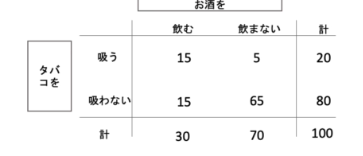

In [324]:
obs = [[15,5],[15,65]]
stats.chi2_contingency(obs, correction = False)

(24.107142857142858,
 9.112167294252327e-07,
 1,
 array([[ 6., 14.],
        [24., 56.]]))

### z検定と自由度1の$\chi^{2}$検定が同じp値になることを確認してみる


In [341]:
n = 50
sample_df1 = df.sample(n)
sample_df2 = df.sample(n)
sample1_dinner = sample_df1['time'].value_counts()[0]
sample2_dinner = sample_df2['time'].value_counts()[0]
#z-test
z = proportions_ztest([sample1_dinner,sample2_dinner], [n,n], alternative='two-sided')
#chi_2-test
obs = [[n-sample1_dinner,n-sample2_dinner], [sample1_dinner,sample2_dinner]]
chi = stats.chi2_contingency(obs, correction=False)

In [342]:
z,chi

((-1.0633485251477834, 0.28762392696447625),
 (1.1307100859339665,
  0.2876239269644732,
  1,
  array([[16.5, 16.5],
         [33.5, 33.5]])))

## 平均値差の標本分布
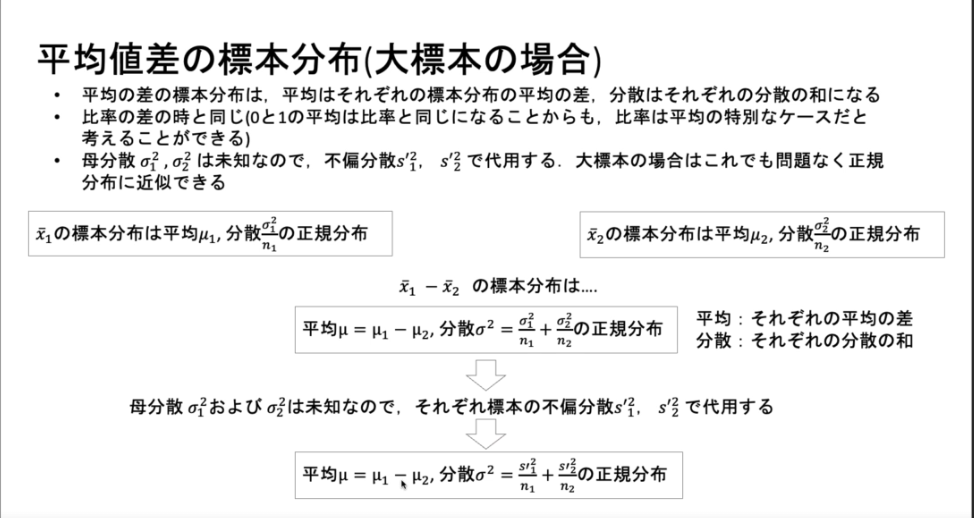

## t検定

<u>t検定</u>

・スチューデントのt検定: stats.ttest_ind(a, b, equal_var=True)

・ウェルチのt検定: stats.ttest_ind(a, b, equal_var=False)

    -第一戻り値はt値
    
    -第二戻り値はp値

In [375]:
#男女のチップ率の平均の差
column = 'tip_rate'

male_df = df[df['sex'] == 'Male'][column]
female_df = df[df['sex'] == 'Female'][column]
st_ttest = stats.ttest_ind(male_mean, female_mean, equal_var=True)
we_ttest = stats.ttest_ind(male_mean, female_mean, equal_var=False)

In [380]:
print(np.var(male_df),np.var(female_df))

0.004169445577529407 0.0028433004255488206


In [376]:
st_ttest,we_ttest

(Ttest_indResult(statistic=-1.0833972270477996, pvalue=0.2797103849605489),
 Ttest_indResult(statistic=-1.1432770167349968, pvalue=0.2542456188927583))

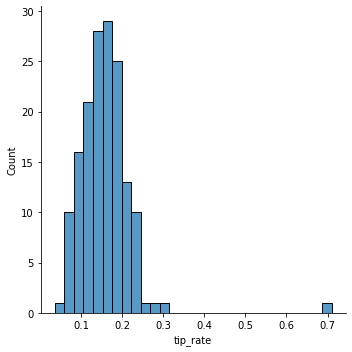

In [377]:
sns.displot(male_df)

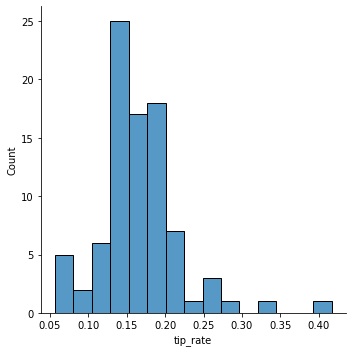

In [378]:
sns.displot(female_df)

<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

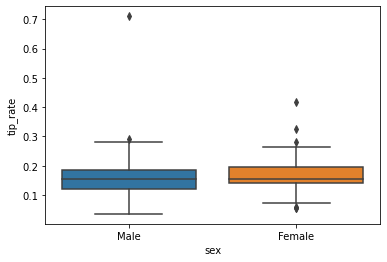

In [379]:
sns.boxplot(data=df, x='sex', y='tip_rate')

## Q-Qプロット

<u>Q-Qプロット</u>

・statsmodels.api.qqplot(data, line='r')
    
    - 関数内で描画される
    - matplotlibのfigureを返す
    - line='r'で、 regression（回帰）の結果を描画する

In [383]:
#tipsデータセットの男女のtip_rateをQQプロットする
male_tipr = df[df['sex'] == 'Male']['tip_rate']
female_tipr = df[df['sex'] == 'Female']['tip_rate']

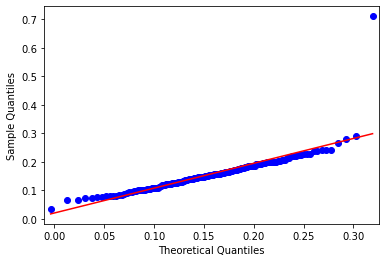

In [395]:
# sns.displot(female_tipr)
fig = qqplot(male_tipr,
             line='r',
             dist=stats.norm(loc=np.mean(male_tipr), scale=np.sqrt(stats.tvar(male_tipr))))

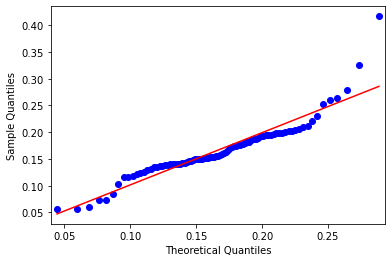

In [396]:
fig = qqplot(female_tipr,
             line='r',
             dist=stats.norm(loc=np.mean(female_tipr), scale=np.sqrt(stats.tvar(female_tipr))))

## シャピロ-ウィルク検定

・シャピロ-ウィルク検定はQ-Qプロットにおいて、どれくらい直線からずれているかを検定する

・標本の順序統計量と正規分布の順序統計量の期待値の相関を検定統計量にする


・stats.shapiro(x)
    
    -　データxに正規性があるかを検定する
    -　第一戻り値は検定統計量
    -　第二戻り値は　p値

In [398]:
stats.shapiro(male_tipr)

ShapiroResult(statistic=0.7447847127914429, pvalue=3.2243281107541917e-15)

In [399]:
stats.shapiro(female_tipr)

ShapiroResult(statistic=0.8982974290847778, pvalue=4.717996489489451e-06)

In [401]:
stats.shapiro(np.sort(male_tipr)[:-1])

ShapiroResult(statistic=0.9931070804595947, pvalue=0.6644759774208069)

In [403]:
stats.shapiro(np.sort(female_tipr)[:-2])

ShapiroResult(statistic=0.9696651697158813, pvalue=0.04252713546156883)

## F検定

・2群の等分散性の検定には、分散の比率を検定統計量に使う

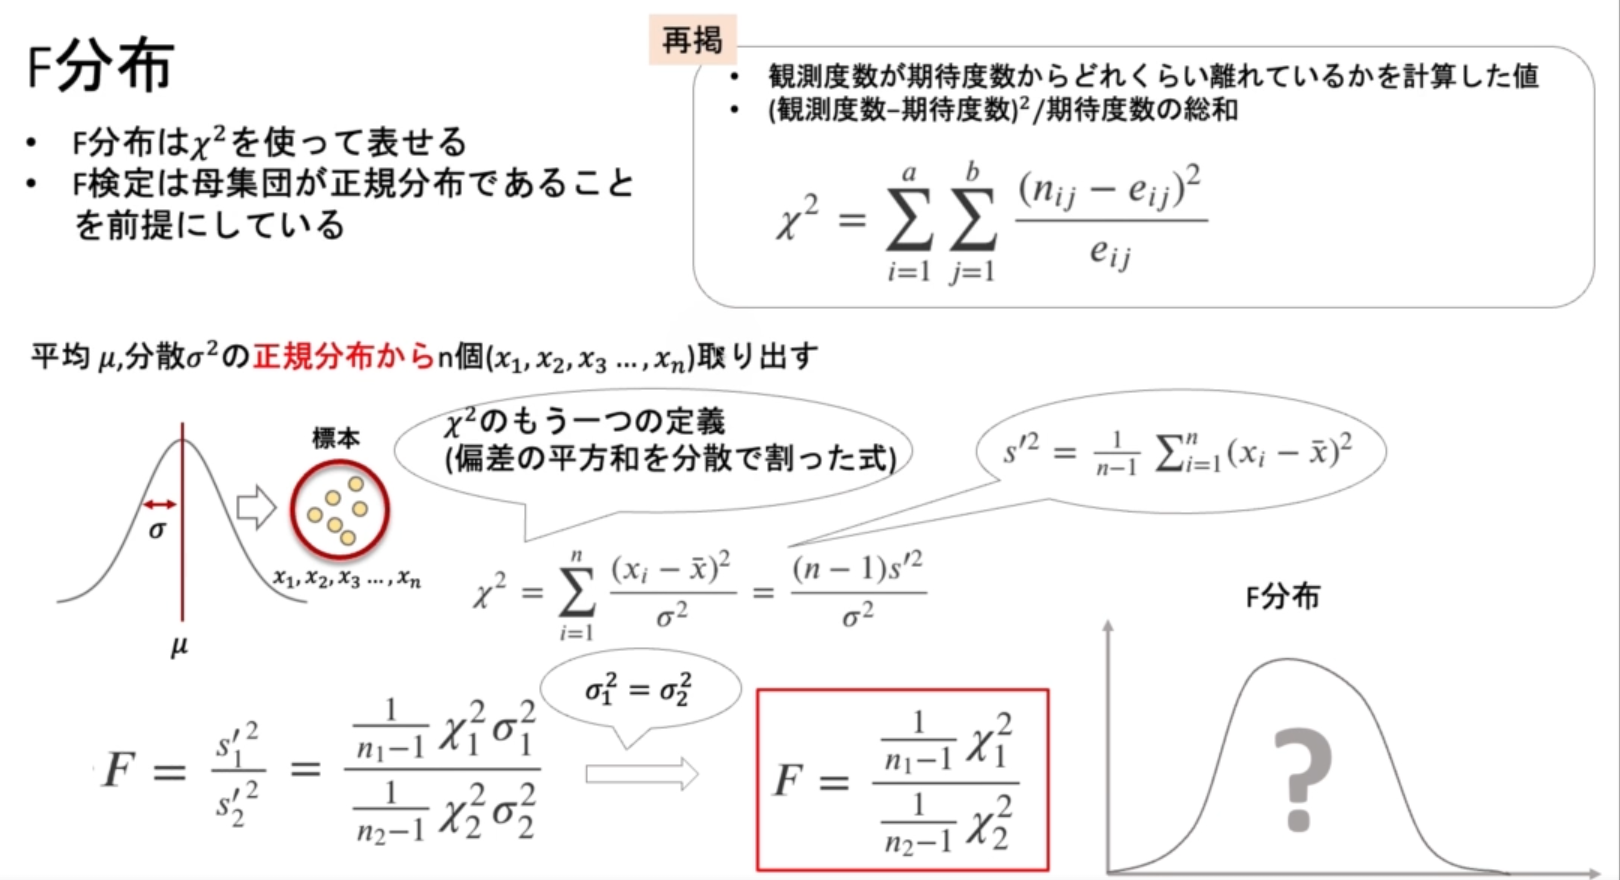

<u>F分布</u>

・stats.f(dfn, dfd)
    
    - dfn:分子の自由度
    - dfd:分母の自由度
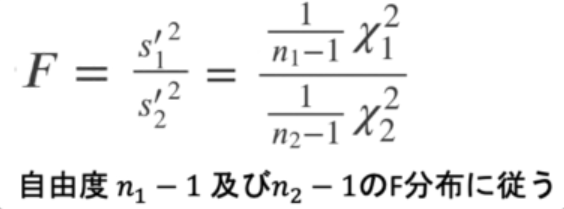

<u>F分布の描画</u>

・stats.f(dfn, dfd).pdf(x)

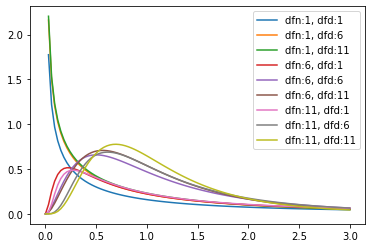

In [410]:
x = np.linspace(0, 3, 100)
for dfn in range(1, 12, 5):
    for dfd in range(1, 12, 5):
        y = stats.f.pdf(x, dfn=dfn, dfd=dfd)
        plt.plot(x, y, label=f'dfn:{dfn}, dfd:{dfd}')
plt.legend()

In [419]:
#tipデータセットの男女のtip_rateに分散の差があるかF検定で調べる
#サンプル数
male_n = len(male_tipr)
female_n = len(female_tipr)

#不偏分散の計算
male_var = stats.tvar(male_tipr)
female_var = stats.tvar(female_tipr)

#Fの計算
F = male_var/female_var if male_var>female_var else female_var/male_var

dfn = male_n if male_var>female_var else female_n
dfd = female_n if male_var>female_var else male_n

#p値の計算
p_value = 1 - stats.f.cdf(F, dfn, dfd)
p_value

0.026480316328374776

In [417]:
male_var

0.004196172792769981

## 変化量の平均の標本分布]
・変化量の母集団からの無作為抽出だと考えれば、変化量の標本平均は平均$\mu_{d}$,分散$\frac{\sigma^{2}_{d}}{n}$の正規分布となる。　（ただし、$\mu_{d}$は変化量の母集団の平均、$\sigma^{2}_{d}$は分散）
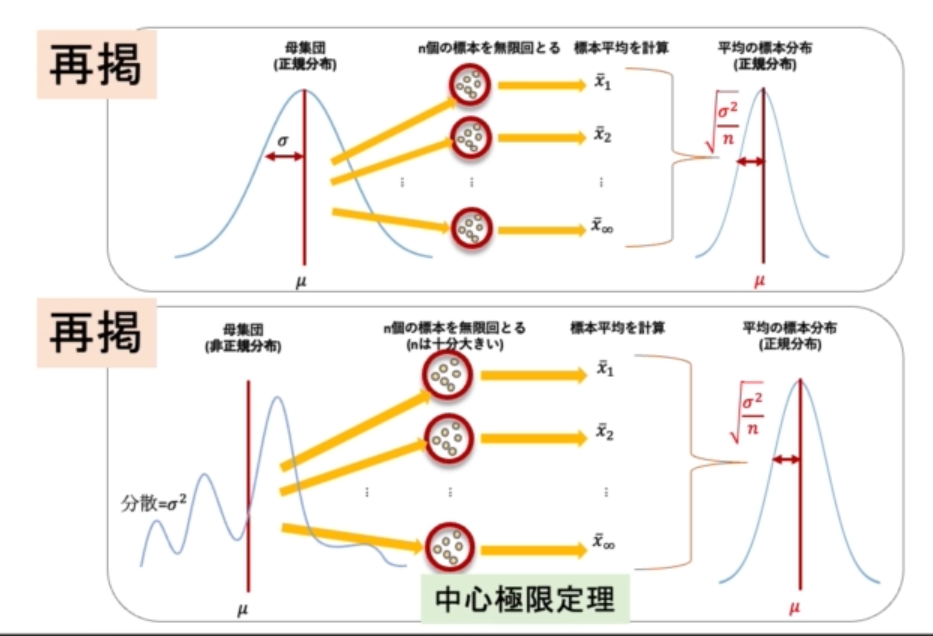

## 対応のある平均値差の検定
・stats.ttest_rel(a, b)
    
    - a,bはデータのarray
    - 第一戻り値は検定統計量t
    - 第二戻り値はp値

In [427]:
bp_df = pd.read_csv('data/blood_pressure.csv')

In [432]:
stats.ttest_rel(bp_df['bp_before'],bp_df['bp_after'], alternative='greater')

Ttest_relResult(statistic=3.3371870510833657, pvalue=0.0005648957322420411)

In [433]:
bp_df['bp_before'].mean()

156.45

In [434]:
bp_df['bp_after'].mean()

151.35833333333332

In [435]:
bp_df['delta'] = bp_df['bp_before'] - bp_df['bp_after']

In [437]:
bp_df['delta'].mean()

5.091666666666667

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='delta'>

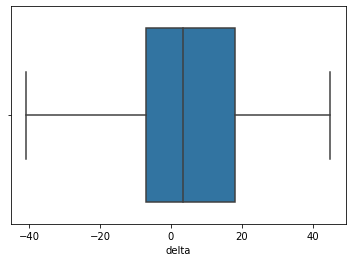

In [438]:
sns.boxplot(bp_df['delta'])